# MOVIE RATING PREDICTION USING PYTHON

In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Step1:Data collection

In [34]:
# Loaded the dataset using pd.read_csv().
# Displayed the first few rows and checked the shape of the dataset to get an overview
data = pd.read_csv('Movie dataset.csv', encoding='ISO-8859-1')

In [35]:
# Check the shape of the dataset
data.shape

(15509, 10)

In [36]:
print("Number of rows",data.shape[0])
print("number of columns",data.shape[1])

Number of rows 15509
number of columns 10


In [37]:
#getting info about our dataset like total number rows,total number of column,datatype of each column and memory requirement
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [38]:
# Display top 10 rows of the dataset
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [39]:
# Display last 10 rows of dataset
data.tail(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15499,Zulm Ka Jawab,(1995),NaN,Action,NaN,NaN,Surinder Kapoor,Goga Kapoor,Shakti Kapoor,Kiran Kumar
15500,Zulm Ka Muqabla,(1993),NaN,Action,NaN,NaN,Babu Antony,Nandamuri Balakrishna,Vijayshanti,NaN
15501,Zulm Ki Hukumat,(1992),NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15502,Zulm Ki Pukar,(1979),NaN,Action,NaN,NaN,Dinesh-Ramanesh,Ramesh Puri,Jalal Agha,Valerie Agha
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [40]:
#check missing values in the dataset
print("Any missing value?",data.isnull().values.any())

Any missing value? True


In [41]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

<Axes: >

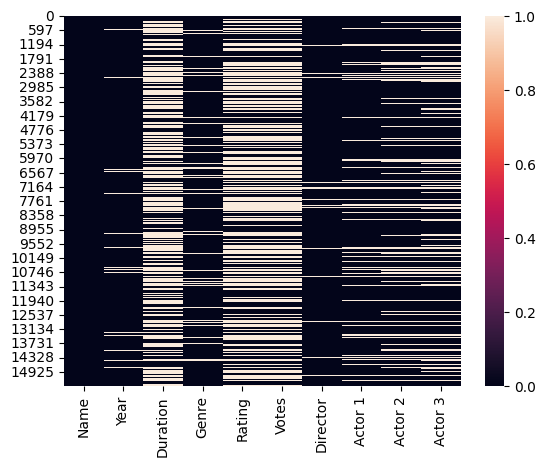

In [42]:
sns.heatmap(data.isnull())

# Step 2: Data Cleaning

In [43]:
#drop all the missing values
data.dropna(inplace=True)

In [44]:
# Verify if missing values are removed
print("\nMissing values after cleaning:")
print(data.isnull().sum())


Missing values after cleaning:
Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


In [45]:
#check for duplicate data
data.duplicated()

1        False
3        False
5        False
6        False
8        False
         ...  
15493    False
15494    False
15503    False
15505    False
15508    False
Length: 5659, dtype: bool

In [46]:
data.drop_duplicates()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [47]:
# Define a function to extract the year from the 'Year' column
def extract_year(year_str):
    try:
        return int(year_str.strip('()'))
    except:
        return None

# Apply the function to the 'Year' column
data['Year'] = data['Year'].apply(extract_year)

# Drop rows with missing or incorrect 'Year' values
data.dropna(subset=['Year'], inplace=True)



In [48]:
# Convert 'Year' to numeric format
data['Year'] = pd.to_datetime(data['Year'], format='%Y').dt.year

# Step 3: EDA (Exploratory Data Analysis)

In [49]:
# Display basic statistics
data.describe()

,Year,Rating
count,5659.000000,5659.000000
mean,1996.247570,5.898533
std,19.741839,1.381165
min,1931.000000,1.100000
25%,1983.000000,5.000000
50%,2002.000000,6.100000
75%,2013.000000,6.900000
max,2021.000000,10.000000


In [50]:
# Print column names to check for the 'rating' column
print("Column Names:")
print(data.columns)

# Check if 'rating' column is present in the dataset
if 'rating' in data.columns:
    # Plotting histogram for 'rating' to visualize its distribution
    plt.figure(figsize=(10, 6))
    plt.hist(data['rating'], bins=30, color='blue', edgecolor='black')
    plt.title('Distribution of Movie Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("The 'rating' column is not present in the dataset.")


Column Names:
Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')
The 'rating' column is not present in the dataset.


In [51]:
# year there was the highest average voting
# Convert 'Votes' column to numeric dtype
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')

# Drop rows with missing 'Votes' values
data.dropna(subset=['Votes'], inplace=True)

# Display mean 'Votes' by 'Year'
mean_votes_by_year = data.groupby('Year')['Votes'].mean()
print(mean_votes_by_year)

Year
1931     59.000000
1932     12.000000
1933     12.000000
1934      8.500000
1935     17.800000
           ...    
2017    147.605442
2018    175.240602
2019    190.859060
2020    150.746667
2021    201.700000
Name: Votes, Length: 91, dtype: float64


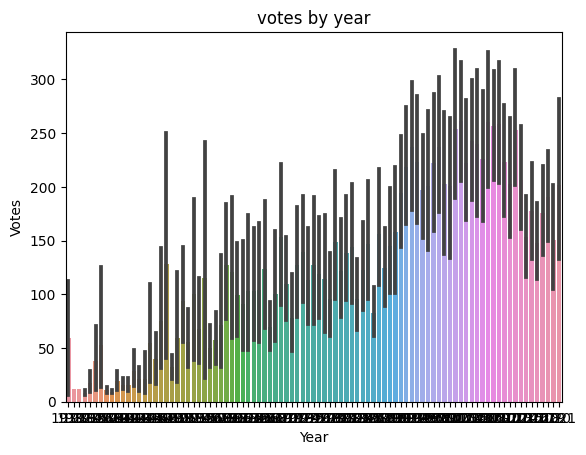

In [52]:
sns.barplot(x='Year',y='Votes',data=data)
plt.title("votes by year")
plt.show()

In [53]:
#find average rating for each director
data.groupby('Director')['Rating'].mean().sort_values()

Director
Sachindra Sharma     1.6
Pramod Mandloi       1.7
Stanley D'Costa      1.8
Raajeev Walia        1.8
Navin Batra          1.9
                    ... 
Arvind Pratap        9.4
Suhrud Godbole       9.4
Munni Pankaj         9.4
Sriram Raja          9.7
Saif Ali Sayeed     10.0
Name: Rating, Length: 2095, dtype: float64

In [54]:
#display movie per year
data['Year'].value_counts()

Year
2019    149
2017    147
2018    133
2015    113
2014    103
       ... 
1931      2
1939      2
1934      2
1933      1
1932      1
Name: count, Length: 91, dtype: int64

<Axes: xlabel='Year', ylabel='count'>

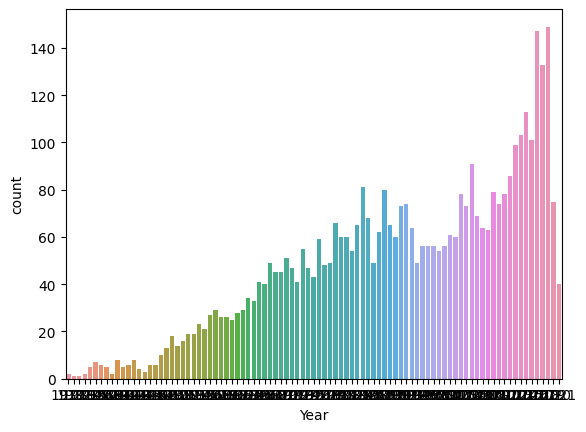

In [55]:
sns.countplot(x='Year',data=data)
 

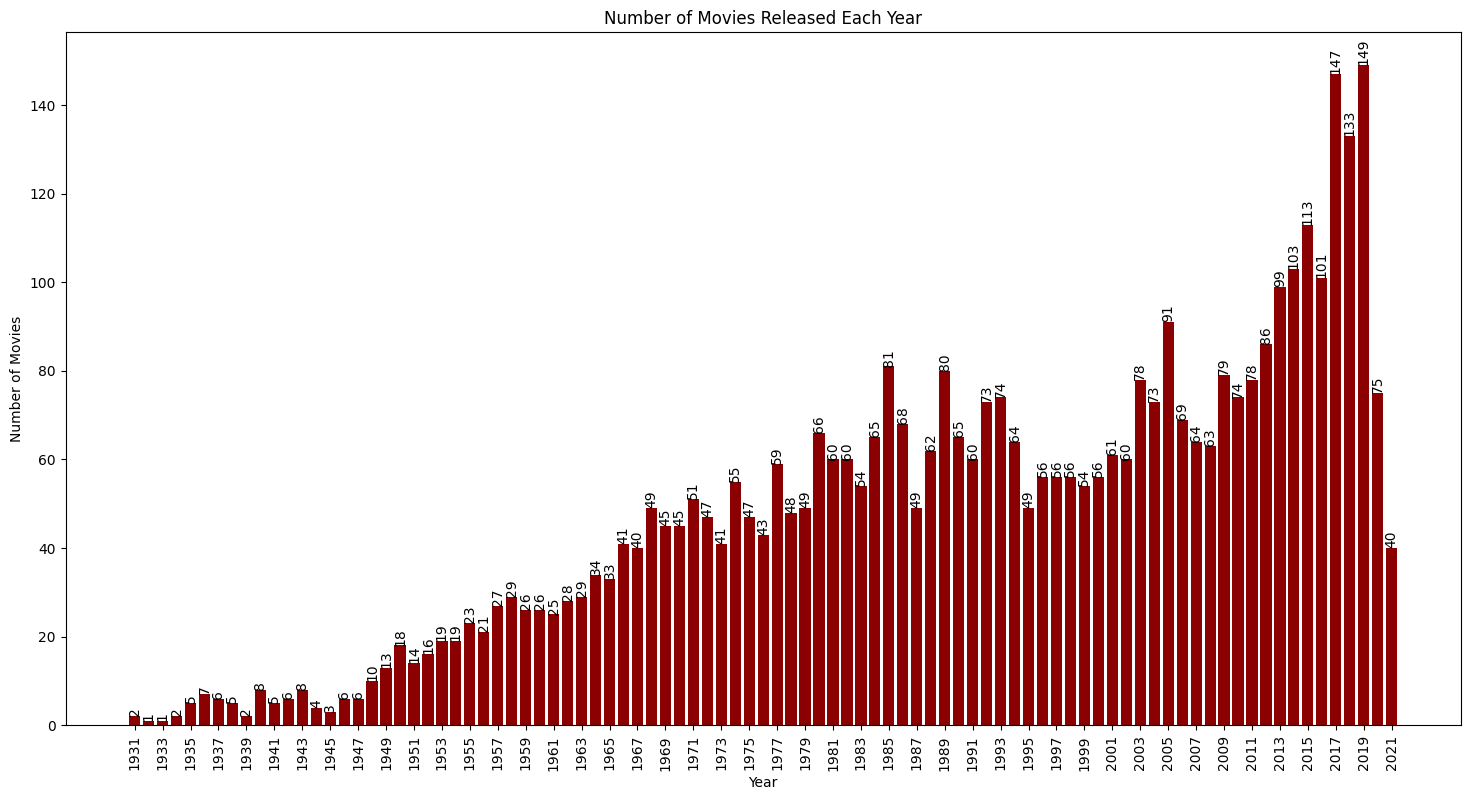

In [56]:
# Number of Movies each Year
yearly_movie_counts = data['Year'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(18, 9))
bars = plt.bar(yearly_movie_counts.index, yearly_movie_counts.values, color='darkred')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year')

# Show every second year on the x-axis and rotate x-labels for better readability
plt.xticks(yearly_movie_counts.index[::2], rotation=90)

# Add text labels on top of each bar
for bar in bars:
    xval = bar.get_x() + bar.get_width() / 2
    yval = bar.get_height()
    plt.text(xval, yval, int(yval), ha='center', va='bottom', rotation=90)

plt.show()

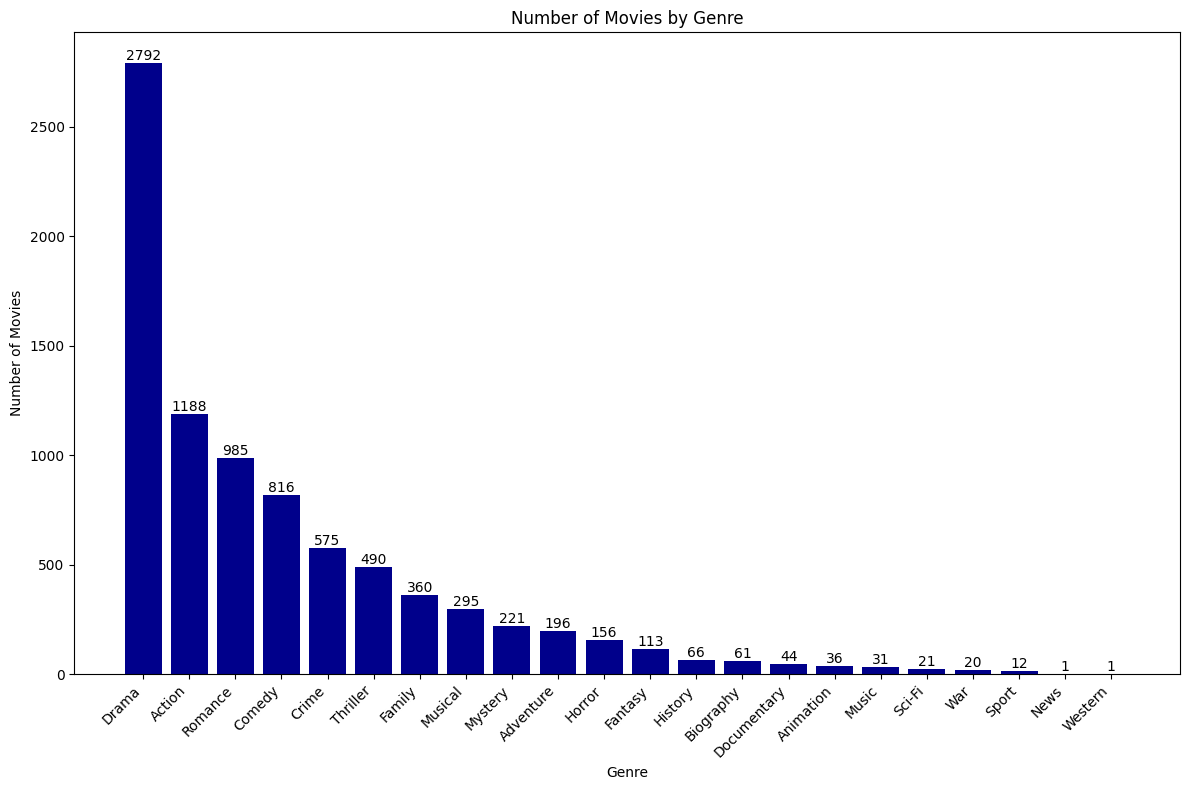

In [57]:
# Creating Genre Dummy Columns and Analyzing Movie Counts by Genre
dummies = data['Genre'].str.get_dummies(', ')

# Creating a new dataframe which combines data and dummies
data_genre = pd.concat([data, dummies], axis=1)

# Analyzing Movie Counts by Genre
genre_counts = dummies.sum().sort_values(ascending=False)

# Create a bar chart for movie counts by genre
plt.figure(figsize=(12, 8))
bars = plt.bar(genre_counts.index, genre_counts.values, color='darkblue')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre')

# Rotate x-labels for better readability
plt.xticks(rotation=45, ha='right')

# Add text labels on top of each bar
for bar in bars:
    xval = bar.get_x() + bar.get_width() / 2
    yval = bar.get_height()
    plt.text(xval, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

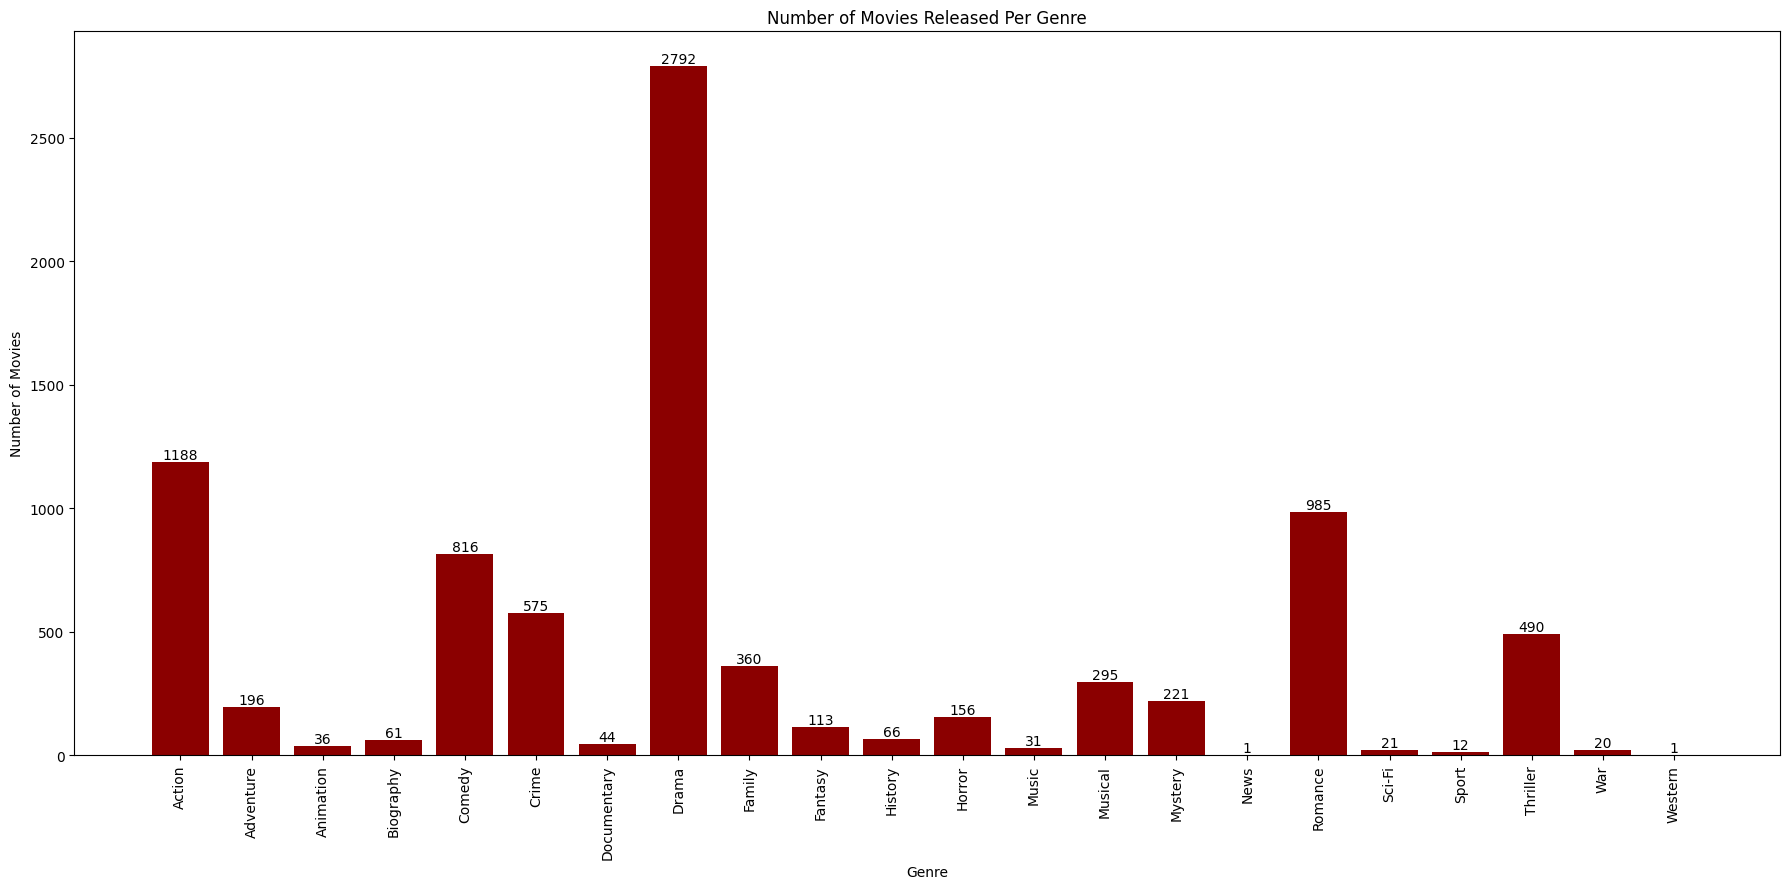

In [58]:
# group the data by genre_columns and count the number of movies in each genre
dummies = data['Genre'].str.get_dummies(', ')

# Creating a new dataframe which combines data and dummies
data_genre = pd.concat([data, dummies], axis=1)

# Group the data by genre columns and count the number of movies in each genre
genre_columns = dummies.columns.tolist()
genre_movie_counts = data_genre[genre_columns].sum().sort_index()

# Create a bar chart
plt.figure(figsize=(18, 9))
bars = plt.bar(genre_movie_counts.index, genre_movie_counts.values, color='darkred')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Per Genre')

plt.xticks(rotation=90)

# Add text labels on top of each bar
for bar in bars:
    xval = bar.get_x() + bar.get_width() / 2
    yval = bar.get_height()
    plt.text(xval, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

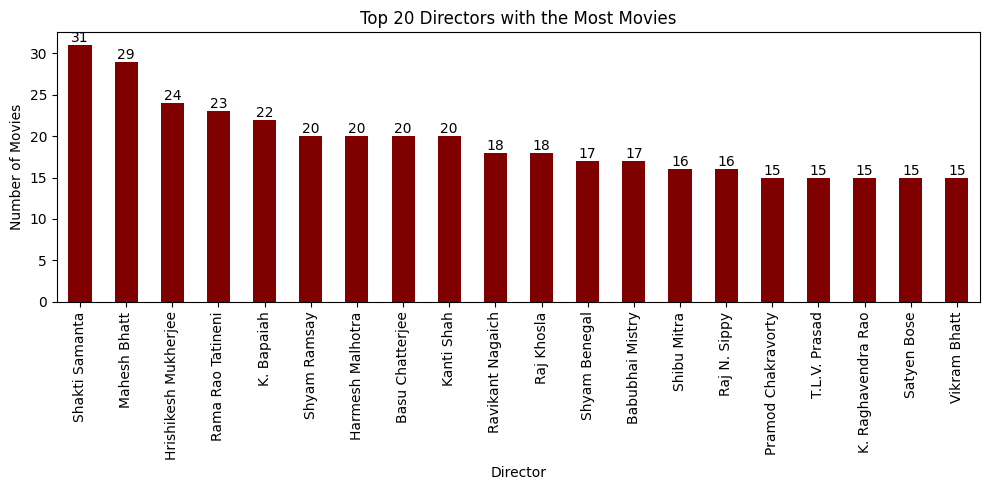

In [59]:
# Top 20 Directors with the Most Movies
# Analyzing count of movies of each director
director_movie_counts = data['Director'].value_counts()

# Create a bar chart for top 20 directors with the most movies
plt.figure(figsize=(10, 5))
bars = director_movie_counts.head(20).plot(kind='bar', color='maroon')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.title('Top 20 Directors with the Most Movies')
plt.xticks(rotation=90)

# Add count labels on top of the bars
for bar in bars.patches:
    xval = bar.get_x() + bar.get_width() / 2
    yval = bar.get_height()
    plt.text(xval, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


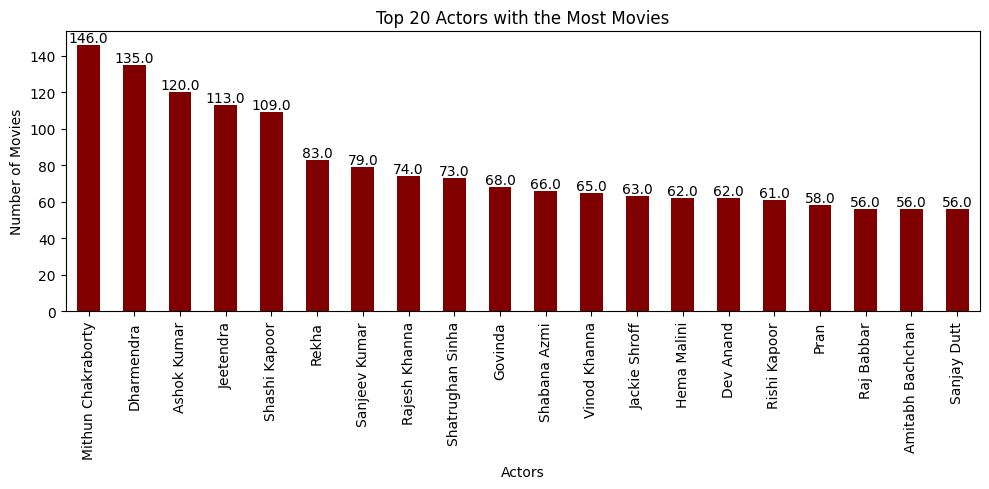

In [34]:
# Count top 20 movies for each actor
actor1_movie_counts = data['Actor 1'].value_counts()
actor2_movie_counts = data['Actor 2'].value_counts()
actor3_movie_counts = data['Actor 3'].value_counts()

actor_movie_counts = actor1_movie_counts.add(actor2_movie_counts, fill_value=0).add(actor3_movie_counts, fill_value=0).sort_values(ascending=False)

# Create a bar chart for top 20 actors with the most movies
plt.figure(figsize=(10, 5))
actor_movie_counts.head(20).plot(kind='bar', color='maroon')
plt.xlabel('Actors')
plt.ylabel('Number of Movies')
plt.title('Top 20 Actors with the Most Movies')
plt.xticks(rotation=90)

# Add count labels on top of the bars
for i, v in enumerate(actor_movie_counts.head(20)):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

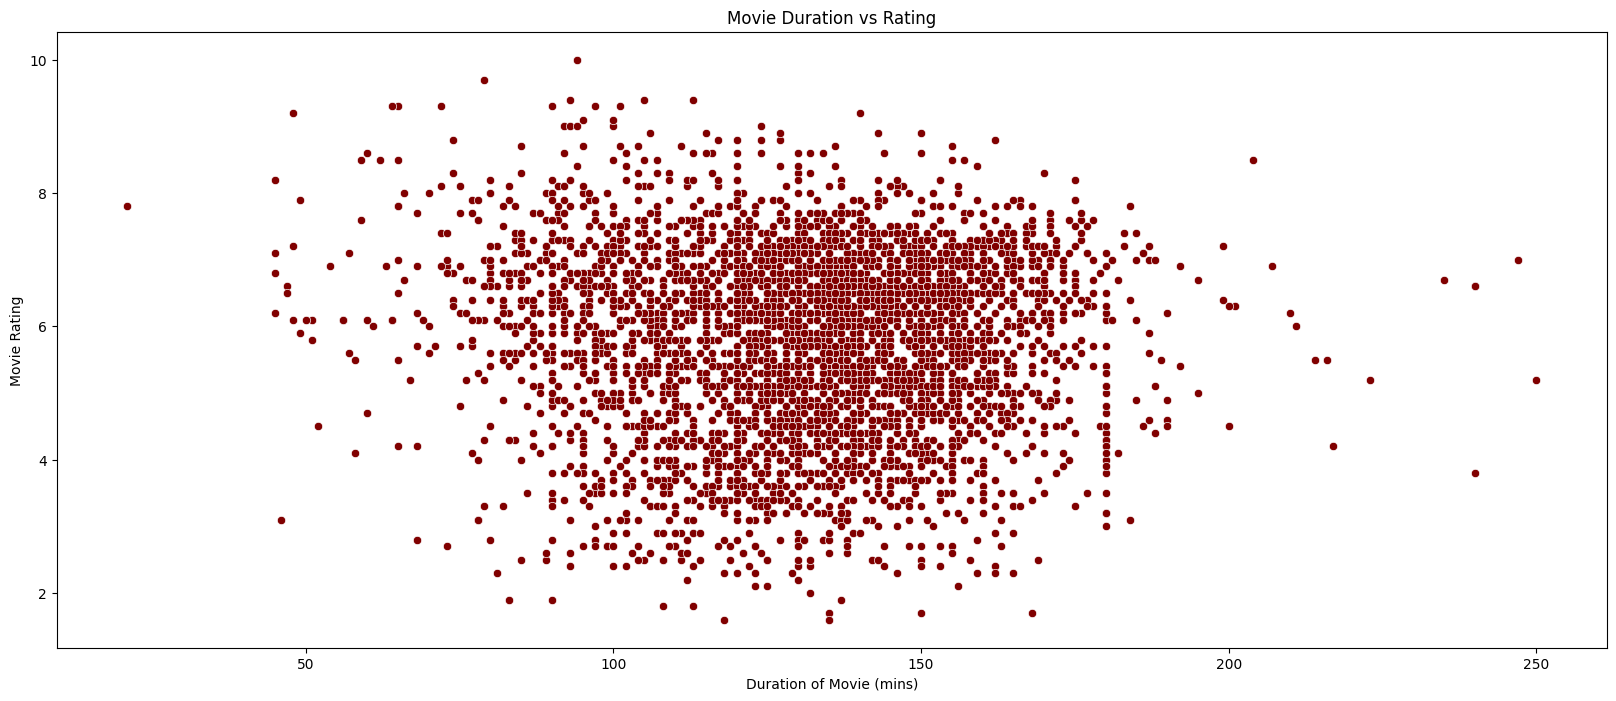

In [60]:
#Movie Duration vs. Rating Scatter Plot

data['Duration'] = pd.to_numeric(data['Duration'].str.rstrip(' min'))

# Create a scatter plot for movie duration vs rating
plt.figure(figsize=(20, 8))
sns.scatterplot(x=data['Duration'], y=data['Rating'], color='maroon')
plt.xlabel('Duration of Movie (mins)')
plt.ylabel('Movie Rating')
plt.title('Movie Duration vs Rating')
plt.show()

# Step 4: Feature Engineering


In [61]:
data.drop(['Name','Director','Actor 1','Actor 2','Actor 3'], axis=1,inplace=True)
# show first five records of the dataframe
data.head()

,Year,Duration,Genre,Rating,Votes
1,2019,109,Drama,7.0,8.0
3,2019,110,"Comedy, Romance",4.4,35.0
5,1997,147,"Comedy, Drama, Musical",4.7,827.0
8,2012,82,"Horror, Mystery, Thriller",5.6,326.0
9,2014,116,"Action, Crime, Thriller",4.0,11.0


In [62]:
X = data[['Year','Duration','Votes']]
y = data['Rating']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=231)


In [14]:
data.drop(['Name', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], axis=1, inplace=True)

# Show first five records of the dataframe
print(data.head())

# Creating target variable and learning observations for the model
X = data[['Year', 'Duration', 'Votes']]
y = data['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=231)

# Show the shape of the training and testing datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

   Year Duration                      Genre  Rating  Votes
1  2019  109 min                      Drama     7.0      8
3  2019  110 min            Comedy, Romance     4.4     35
5  1997  147 min     Comedy, Drama, Musical     4.7    827
6  2005  142 min        Drama, Romance, War     7.4  1,086
8  2012   82 min  Horror, Mystery, Thriller     5.6    326
Shape of X_train: (4527, 3)
Shape of X_test: (1132, 3)
Shape of y_train: (4527,)
Shape of y_test: (1132,)


# Step 5: Model Building

In [63]:
#i.linear regression model
# creating a liner regression model
lr = LinearRegression()

# training the data on linear regression model
lr.fit(X_train, y_train)

# predicting the test data on trained model
pred = lr.predict(X_test)

# evaluating linear regression model
r2_score(y_test,pred)


0.10300101562539032

In [64]:
# ii. K-Nearest Neighbors (KNN) Regression Model
# creating a range for number of neighbors parameter of the KNN model
kRange = range(1,40,1)

# creating an empty scores list
scores_list = []

# iterate every value in kRange list 
for i in kRange:
    # create a K Nearest Neighbor model with i as number of neighbors
    regressor_knn = KNeighborsRegressor(n_neighbors = i)
    
    # fit training data to the KNN model
    regressor_knn.fit(X_train,y_train)
    # evaluate the model
    pred = regressor_knn.predict(X_test)
    
    # append the regression score for evaluation of the model to scores_list
    scores_list.append(r2_score(y_test,pred))

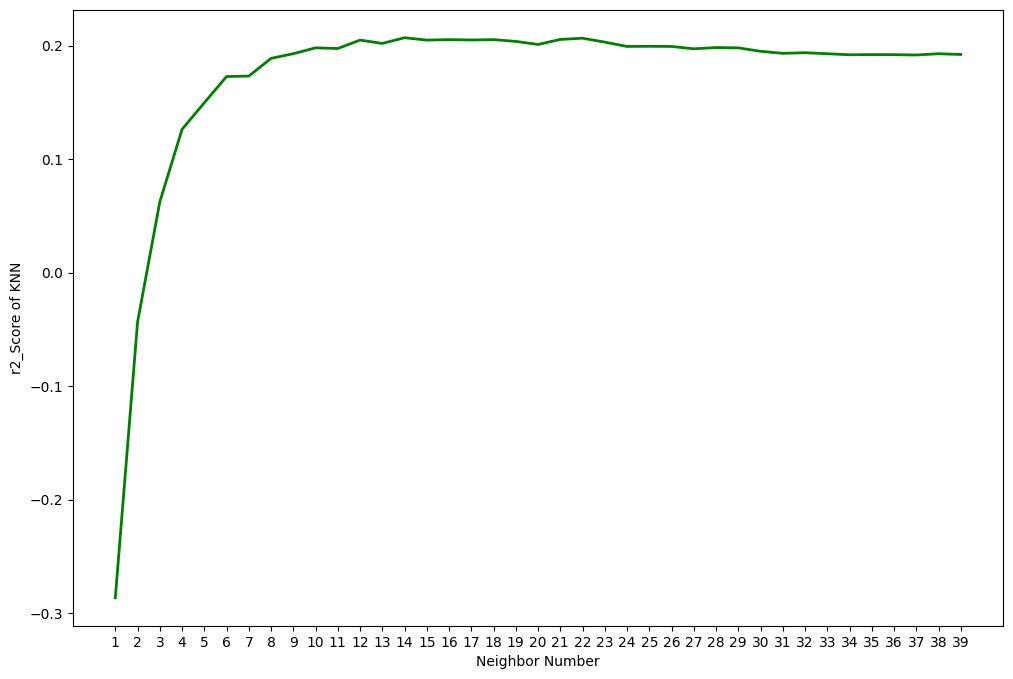

In [65]:
plt.figure(figsize=(12,8))
# create a line graph for showing regression score (scores_list) for respective number of neighbors used in the KNN model
plt.plot(kRange, scores_list, linewidth=2, color='green')
# values for x-axis should be the number of neighbors stored in kRange
plt.xticks(kRange)
plt.xlabel('Neighbor Number')
plt.ylabel('r2_Score of KNN')
plt.show() 

In [66]:
# Creating a KNN model with best parameters i.e., number of neighbors = 23
regressor_knn = KNeighborsRegressor(n_neighbors = 23)

# fit training data to the KNN model
regressor_knn.fit(X_train,y_train)
# evaluate test data on the model
pred = regressor_knn.predict(X_test)
# show regression score
r2_score(y_test,pred)

0.20315834948852585

In [67]:
#iii. SGD Regression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

# Create an instance of the SGDRegressor
sgd_regressor = SGDRegressor(max_iter=100, random_state=1)  # You can adjust the max_iter and random_state

# Fit the model to your training data
sgd_regressor.fit(X_train, y_train)

# Make predictions
pred = sgd_regressor.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, pred)

print("R-squared score:", r2)

R-squared score: -4.4066503841763294e+28


In [68]:
# iv.Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=1)
rf_regressor.fit(X_train, y_train)
rf_pred = rf_regressor.predict(X_test)
r2_rf = r2_score(y_test, rf_pred)
print(f'R-squared score (Random Forest): {r2_rf}')

R-squared score (Random Forest): 0.19865138886888678


In [69]:
# v. Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=231)
gb_regressor.fit(X_train, y_train)
gb_pred = gb_regressor.predict(X_test)
r2_gb = r2_score(y_test, gb_pred)
print(f'R-squared score: {r2_gb}')

R-squared score: 0.2664566351949291


# Step 6: model evalution

In [73]:

model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

RMSE: 1.31
MAE: 1.04
